# Analysis of the computer games market

## Data description
- Name - name of the game
- Platform
- Year_of_Release 
- Genre - game genre
- NA_sales - North American sales (millions of copies sold)
- EU_sales - European sales (millions of copies sold)
- JP_sales - sales in Japan (millions of copies sold)
- Other_sales - sales in other countries (millions of copies sold)
- Critic_Score - critics score
- User_Score - users rating
- Rating - rating from the ESRB organization.
- Data for 2016 may be incomplete.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

## Opening the data

In [2]:
df = pd.read_csv('/project/datasets/games.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


The file contains 16715 lines and 11 columns. The columns Name, Year_of_Release, Genre, Critic_Score, User_Score and Rating have missing values. Data types need to be changed and column names need to be converted to lower case.

## Data preprocessing

In [5]:
df.duplicated().sum()

0

In [6]:
df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

In [7]:
df.columns = [col.lower() for col in df.columns]

In [8]:
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [9]:
df.dtypes

name                object
platform            object
year_of_release    float64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score          object
rating              object
dtype: object

Now change the data type of the year of issue to integer

In [10]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [11]:
df['year_of_release'].isna().sum()

269

In [12]:
df = df.dropna(subset = ['year_of_release']).reset_index(drop = True)

In [13]:
df['year_of_release'].isna().sum()

0

In [14]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [15]:
df['year_of_release'] = df['year_of_release'].astype(int)

In [16]:
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

The data on the user rating of games contains the value 'tbd' (to be done), that is, the games have not yet been rated, but it is planned to be done. So at the moment of data unloading there was no such information, for further analysis let's replace tbd in the column 'user_score' with NaN and change the data type to 'float'

In [17]:
df['user_score'] = df['user_score'].replace(['tbd'],np.nan)

In [18]:
df['user_score'] = df['user_score'].astype(float)

In [19]:
df['rating'].isna().sum()

6678

In [20]:
len(df.query('year_of_release <= 1994'))

488

In [21]:
df.query('year_of_release <= 1994 and rating.isna()', engine = 'python')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
18,Super Mario World,SNES,1990,Platform,12.78,3.75,3.54,0.55,NaN,NaN,NaN
21,Super Mario Land,GB,1989,Platform,10.83,2.71,4.18,0.42,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
15307,Mortal Kombat,PC,1994,Fighting,0.02,0.00,0.00,0.00,NaN,NaN,NaN
15446,Empire Deluxe,PC,1992,Strategy,0.02,0.00,0.00,0.00,NaN,NaN,NaN
15540,World Class Rugby 2: Kokunai Gekitou Hen '93,SNES,1994,Sports,0.00,0.00,0.02,0.00,NaN,NaN,NaN
15706,Strongest Tokyo University Shogi DS,DS,1985,Action,0.00,0.00,0.02,0.00,NaN,NaN,NaN


In [22]:
df.query('year_of_release <= 1994 and ~rating.isna()', engine = 'python')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1552,Battle Arena Toshinden,PS,1994,Fighting,0.39,0.26,0.53,0.08,69.0,6.3,T
2576,The 7th Guest,PC,1992,Adventure,0.02,0.77,0.00,0.00,NaN,NaN,T
14243,Alter Ego,PC,1985,Simulation,0.00,0.03,0.00,0.01,59.0,5.8,T
14381,Doom,PC,1992,Shooter,0.02,0.00,0.00,0.00,85.0,8.2,M
14392,SimCity,PC,1988,Simulation,0.00,0.02,0.00,0.01,64.0,2.2,E10+


Since the esrb rating was established in 1994, replace the NaN values for games published in 1994 and earlier with "w/o rating"

In [23]:
def rating(row):
    if row['year_of_release'] <= 1994 and pd.isna(row['rating']):
        return 'w/o rating'
    else:
        return row['rating']
        

In [24]:
df['rating'] = df.apply(rating, axis=1)

In [25]:
df.query('year_of_release <= 1994')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,w/o rating
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,w/o rating
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,w/o rating
18,Super Mario World,SNES,1990,Platform,12.78,3.75,3.54,0.55,NaN,NaN,w/o rating
21,Super Mario Land,GB,1989,Platform,10.83,2.71,4.18,0.42,NaN,NaN,w/o rating
...,...,...,...,...,...,...,...,...,...,...,...
15307,Mortal Kombat,PC,1994,Fighting,0.02,0.00,0.00,0.00,NaN,NaN,w/o rating
15446,Empire Deluxe,PC,1992,Strategy,0.02,0.00,0.00,0.00,NaN,NaN,w/o rating
15540,World Class Rugby 2: Kokunai Gekitou Hen '93,SNES,1994,Sports,0.00,0.00,0.02,0.00,NaN,NaN,w/o rating
15706,Strongest Tokyo University Shogi DS,DS,1985,Action,0.00,0.00,0.02,0.00,NaN,NaN,w/o rating


Let's replace the remaining NaNs in the 'rating' column with 'unknown'.

In [26]:
df['rating'] = df['rating'].fillna('unknown').copy()

In [27]:
df.isna().mean()

name               0.000122
platform           0.000000
year_of_release    0.000000
genre              0.000122
na_sales           0.000000
eu_sales           0.000000
jp_sales           0.000000
other_sales        0.000000
critic_score       0.514593
user_score         0.546212
rating             0.000000
dtype: float64

In [28]:
df[df['genre'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
652,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,w/o rating
14022,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,w/o rating


Let's delete entries without the name of the game and genre.

In [29]:
df = df.dropna(subset = ['genre']).reset_index(drop = True)

In [30]:
df.isna().mean()

name               0.000000
platform           0.000000
year_of_release    0.000000
genre              0.000000
na_sales           0.000000
eu_sales           0.000000
jp_sales           0.000000
other_sales        0.000000
critic_score       0.514534
user_score         0.546157
rating             0.000000
dtype: float64

In [31]:
df['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [32]:
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [33]:
sales_names = ['na_sales','eu_sales','jp_sales','other_sales']

In [34]:
title_n = [' North America',' Europe ', ' Japan ', ' other regions']

In [35]:
def sales_hist(sales_names, title_n):
    for i,j in zip(sales_names, title_n):
        df[i].hist(bins = 30, range = (0,10))
        plt.title('distribution of the number of games sold in ' + j)
        plt.ylabel('частота')
        plt.xlabel('Sales, millions')
        plt.show()

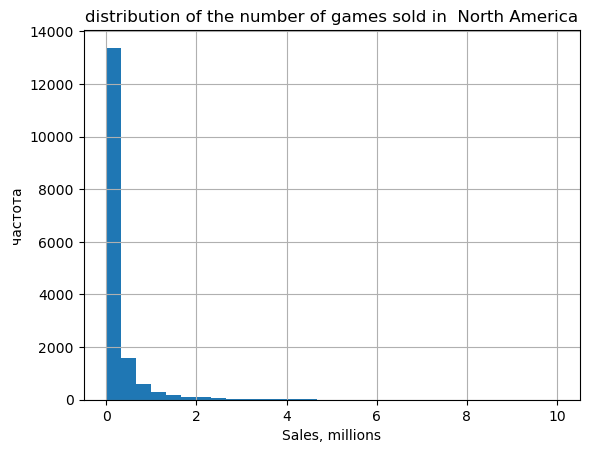

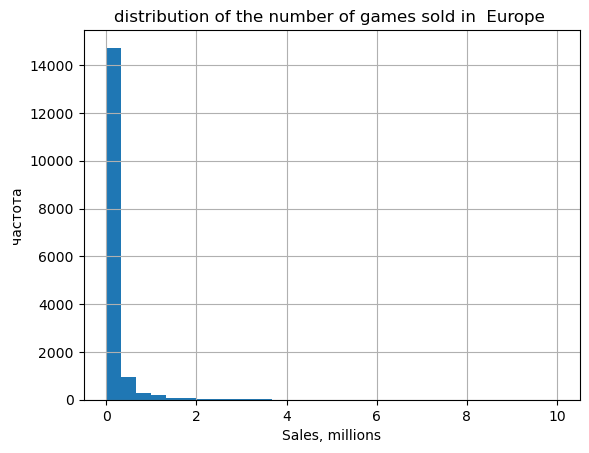

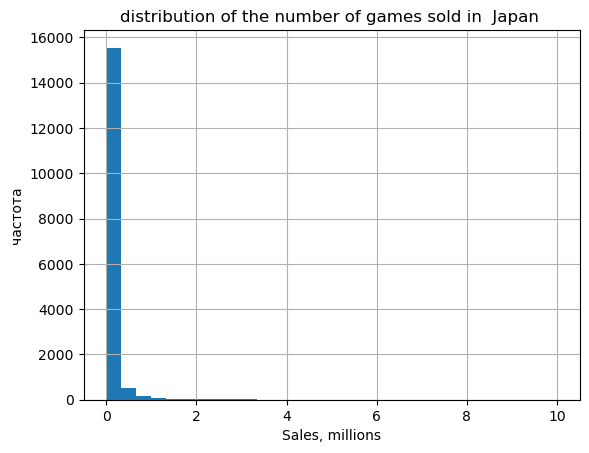

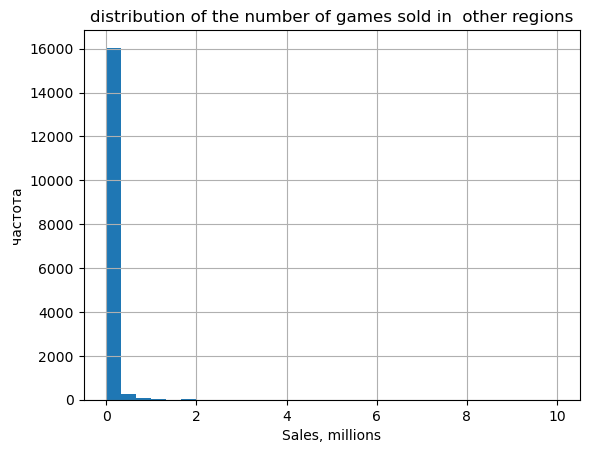

In [36]:
sales_hist(sales_names,title_n)

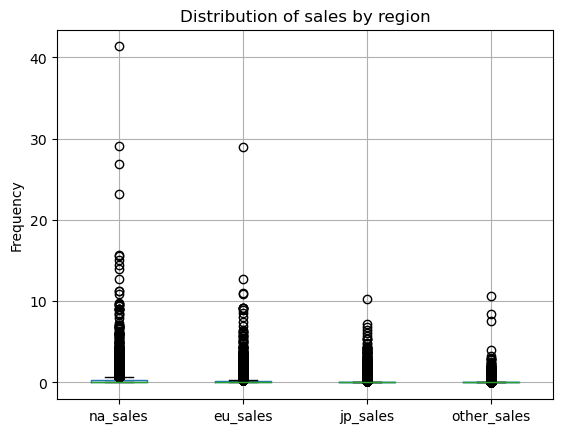

In [37]:
df.boxplot(column = ['na_sales', 'eu_sales', 'jp_sales', 'other_sales'])
plt.title('Distribution of sales by region')
plt.ylabel('Frequency')
plt.show()

In [38]:
def regions_sum(row):
    total = row['na_sales'] + row['eu_sales'] + row['jp_sales'] + row['other_sales']
    return total

In [39]:
df['total_sales'] = df.apply(regions_sum, axis=1)

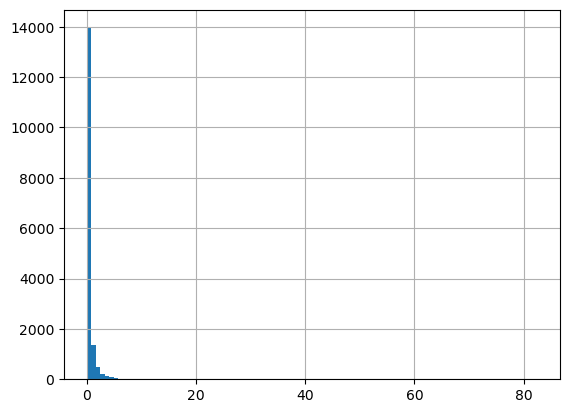

In [40]:
df['total_sales'].hist(bins = 100)
plt.show()

In [41]:
df.query('total_sales > 10').sort_values('total_sales', ascending = False).head(50)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,w/o rating,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,w/o rating,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,w/o rating,28.31


In [42]:
df[df['total_sales'] == 0]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16405,G1 Jockey 4 2008,PS3,2008,Sports,0.0,0.0,0.0,0.0,NaN,NaN,unknown,0.0
16438,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,0.0,0.0,0.0,0.0,NaN,NaN,unknown,0.0


In [43]:
df['total_sales'] = df['total_sales'].replace(0, np.nan)

In [44]:
df = df.dropna(subset = ['total_sales']).reset_index(drop = True)

In [45]:
len(df)

16442

### Conclusion
Column names are lowercase. Removed 269 rows with missing information about the year of game release, removed 2 rows with missing game name and genre. Changed 'year_of_release' column data type to integer. Changed 'user_score' column data type to float. Calculated the total number of sales for all regions. A half of the values in the 'critic_score' and 'user_score' variables are absent in the data.

## Exploratory data analysis

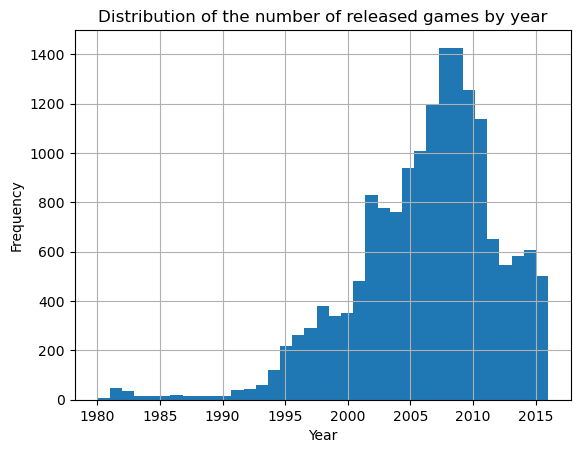

In [46]:
df['year_of_release'].hist(bins = 37)
plt.title('Distribution of the number of released games by year')
plt.ylabel('Frequency')
plt.xlabel('Year')
plt.show()

In [47]:
df['year_of_release'].value_counts().sort_index(ascending = False)

2016     502
2015     606
2014     581
2013     544
2012     653
2011    1136
2010    1255
2009    1426
2008    1425
2007    1197
2006    1006
2005     939
2004     762
2003     775
2002     829
2001     482
2000     350
1999     338
1998     379
1997     289
1996     263
1995     219
1994     121
1993      60
1992      43
1991      41
1990      16
1989      17
1988      15
1987      16
1986      21
1985      14
1984      14
1983      17
1982      36
1981      46
1980       9
Name: year_of_release, dtype: int64

The distribution is asymmetrical with a negative bias. Till 1994 less than 100 games a year were released. From 1994 to 2008 there was a gradual growth of the number of released games a year with the maximum number of games in 2008 which was 1426 units. From 2009 to 2015 there was a decline in the number of games released. From 2012 the number of released games varies from 500 to 650, this fact can be explained by the fact that games have become much more complicated in terms of graphics and gameplay and it takes more time to create a game. To predict the game-industry behavior in 2017, let's analyze the period from 2011 to 2016 (the number of released games is decreasing, and then it goes on a plateau).

In [48]:
top_5 = (df
 .query('year_of_release >= 2011')
 .pivot_table(index = ['platform'], 
              values = ['total_sales'], 
              aggfunc = 'sum')
 .sort_values('total_sales', ascending = False)
 .head()
)
top_5

,total_sales
platform,
PS3,445.57
X360,380.38
PS4,314.14
3DS,257.81
XOne,159.32


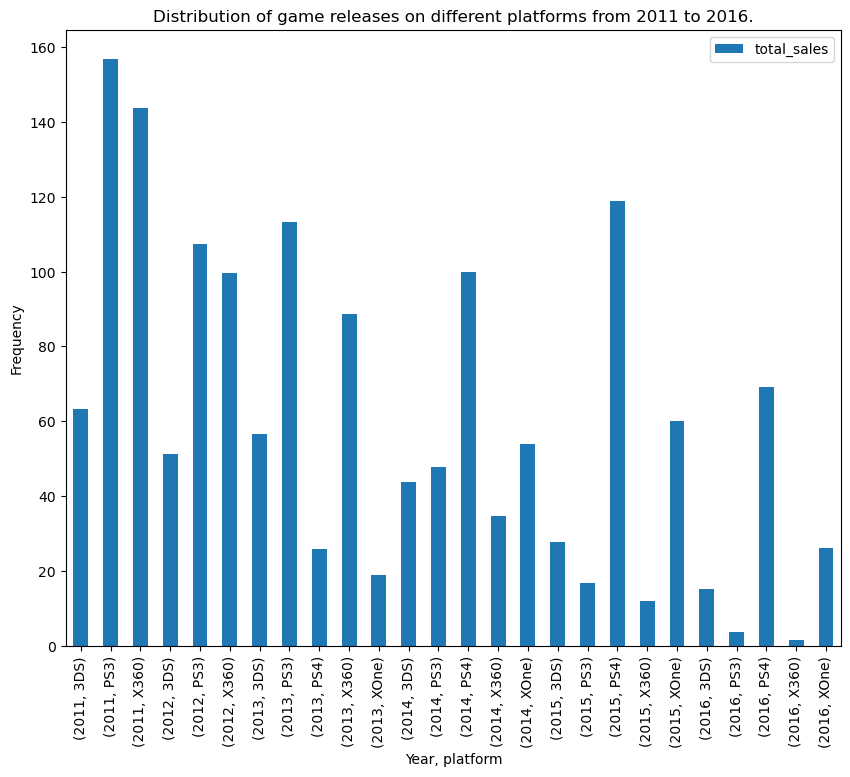

In [49]:
(df
 .query('year_of_release >= 2011 and platform in @top_5.index')
 .pivot_table(index = ['year_of_release','platform'], 
              values = 'total_sales', 
              aggfunc = 'sum')
 .plot(kind = 'bar', figsize = (10,8))
)
plt.title('Distribution of game releases on different platforms from 2011 to 2016.')
plt.xlabel('Year, platform')
plt.ylabel('Frequency')
plt.show()

In [50]:
pd.set_option('display.max_columns', None)

In [51]:
(df
 .query('year_of_release >= 2011 and platform in @top_5.index')
 .pivot_table(index = ['year_of_release','platform'], 
              values = 'total_sales', 
              aggfunc = 'sum').transpose()
)

year_of_release  2011                   2012                  2013          \
platform          3DS     PS3    X360    3DS     PS3   X360    3DS     PS3   
total_sales      63.2  156.78  143.84  51.36  107.36  99.74  56.57  113.25   

year_of_release                        2014                              \
platform           PS4   X360   XOne    3DS    PS3    PS4   X360   XOne   
total_sales      25.99  88.58  18.96  43.76  47.76  100.0  34.74  54.07   

year_of_release   2015                               2016                    \
platform           3DS    PS3    PS4   X360   XOne    3DS  PS3    PS4  X360   
total_sales      27.78  16.82  118.9  11.96  60.14  15.14  3.6  69.25  1.52   

year_of_release         
platform          XOne  
total_sales      26.15

The most popular platforms from 2011 to 2016 were: PS4, PS3, X360, 3DS, XOne.

Minimum sales:
- 2011 - 3DS
- 2012 - 3DS
- 2013 - XOne, PS4
- 2014 - X360, 3DS
- 2015 - X360, PS3
- 2016 - X360, PS3

Maximum sales:
- 2011 - PS3, X360
- 2012 - PS3, X360
- 2013 - PS3, X360
- 2014 - PS4, XOne
- 2015 - PS4, XOne
- 2016 - PS4, XOne

For the mentioned period, the PlayStation series platforms lead in sales, with Microsoft platforms in second place. 


Sales for the PS3, 3DS and X360 platforms are all evenly declining from 2011 to 2016. Sales for the PS4 and XOne platforms have been rising from 2013 to 2015 (possibly in 2016 as well, since the data is incomplete). The most promising PS4 and XOne platforms.

In [52]:
def boxplt(df):
    df['xone'] = df.query('year_of_release >= 2011 and platform == "XOne"')['total_sales']
    df['ps4'] = df.query('year_of_release >= 2011 and platform == "PS4"')['total_sales']
    df['ps3'] = df.query('year_of_release >= 2011 and platform == "PS3"')['total_sales']
    df['3ds'] = df.query('year_of_release >= 2011 and platform == "3DS"')['total_sales']
    df['x360'] = df.query('year_of_release >= 2011 and platform == "X360"')['total_sales']
    df.boxplot(column= ['xone','ps4','ps3','x360','3ds'], figsize = (10,8))
    plt.title('Distribution of game sales by platform')
    plt.ylabel('number of copies, millions')
    return print('Median values:\n',
                 'XOne ', df['xone'].median(), 
                 '\n PS4 ', df['ps4'].median(),
                 '\n PS3 ', df['ps3'].median(),
                 '\n 3DS ',df['3ds'].median(),
                 '\n X360 ',df['x360'].median())
   


Median values:
 XOne  0.22 
 PS4  0.2 
 PS3  0.21 
 3DS  0.12 
 X360  0.27


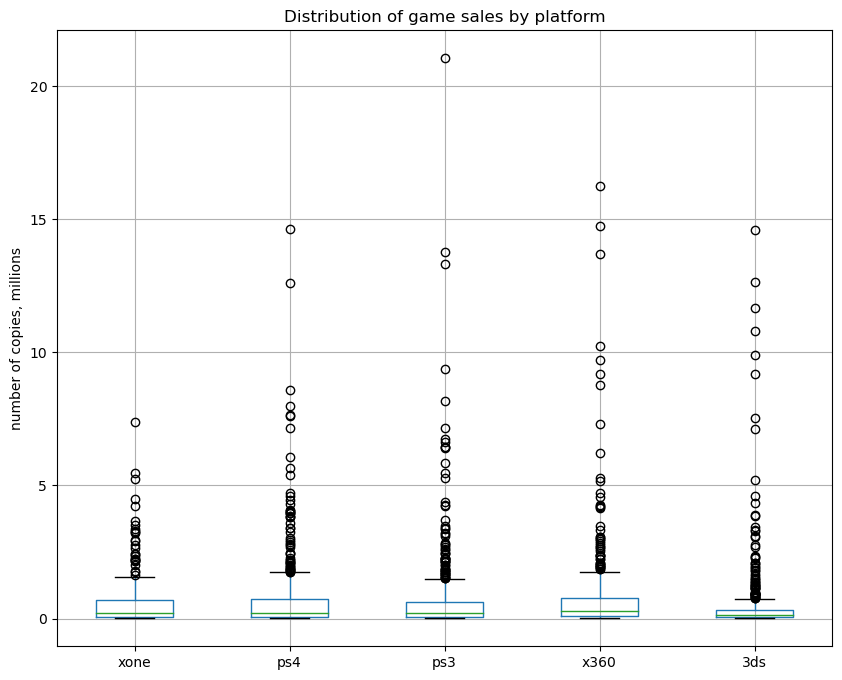

In [53]:
boxplt(df)

In [54]:
df.query('year_of_release >= 2011 and platform in @top_5.index').pivot_table(index = 'platform', values = 'total_sales', aggfunc = ('sum','count'))

,count,sum
platform,,
3DS,512,257.81
PS3,708,445.57
PS4,392,314.14
X360,498,380.38
XOne,247,159.32


In [55]:
 df = df.drop(['xone','ps4','ps3','x360','3ds'], axis = 1)

For the period from 2011 to 2016 the average minimum number of games was sold for the platform 3DS, also for this platform there are games with a circulation of more than 14 million copies.  
Median values for the top 5 platforms: XOne 0.22, PS4 0.2, PS3 0.21, 3DS 0.12, X360 0.27. 
The largest scatter in the number of games sold, in descending order: PS3, X360, PS4, 3DS, XOne.
In this case, for the task at hand, the "'whiskers box" is not informative.

In [56]:
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating',
       'total_sales'],
      dtype='object')

Let's assess the impact of the ratings of critics and users on the sales of games on the example of the most popular platform - PS3

In [57]:
df_test = df.query('year_of_release >= 2011').copy()

In [58]:
df_1 = df.query('year_of_release >= 2011 and platform == "PS3"')

In [59]:
df_ps3 = df_1[['na_sales','eu_sales','jp_sales',
               'other_sales','total_sales','critic_score','user_score']]

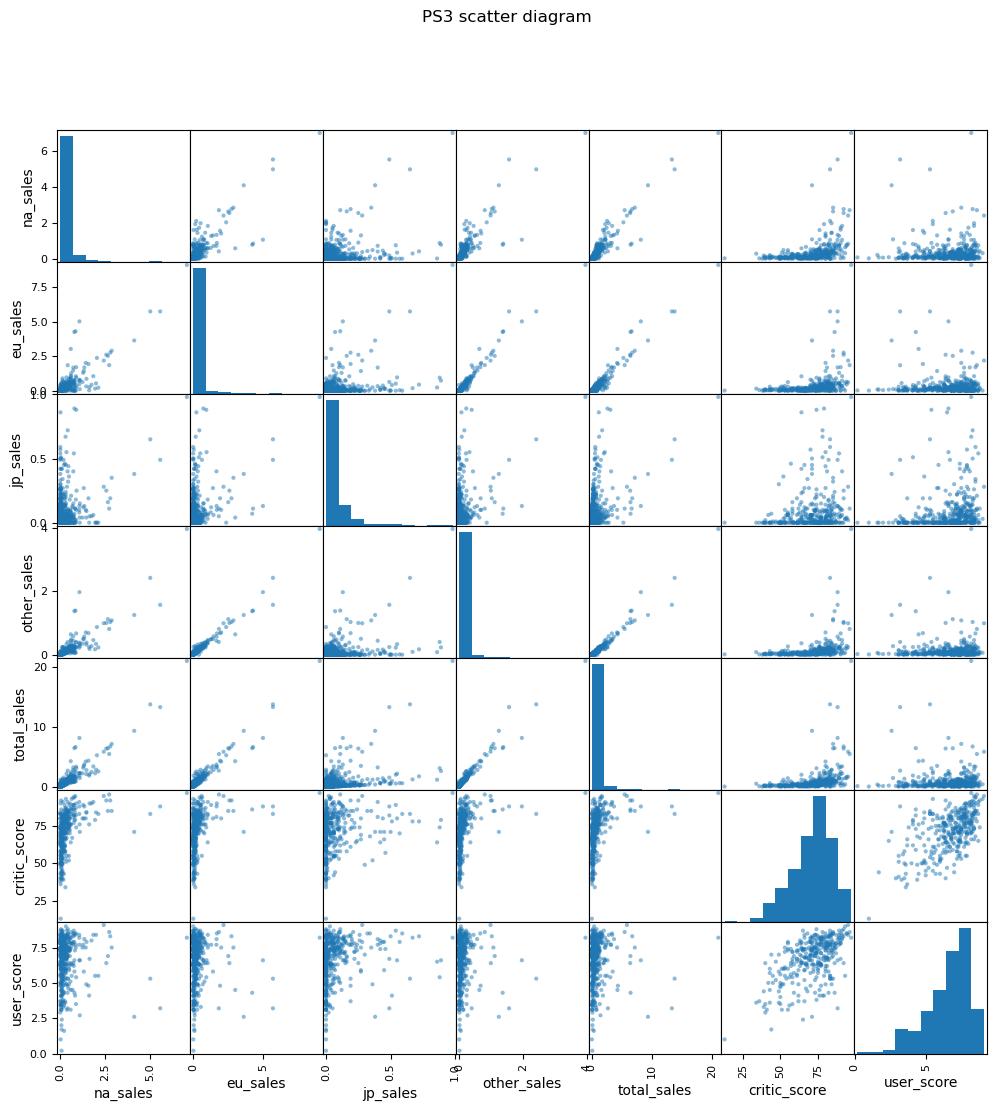

In [60]:
pd.plotting.scatter_matrix(df_ps3, figsize=(12,12))
plt.suptitle('PS3 scatter diagram')
plt.show()

In [61]:
corr = df_ps3.corr()

Text(0.5, 1.0, 'PS3 correlation matrix')

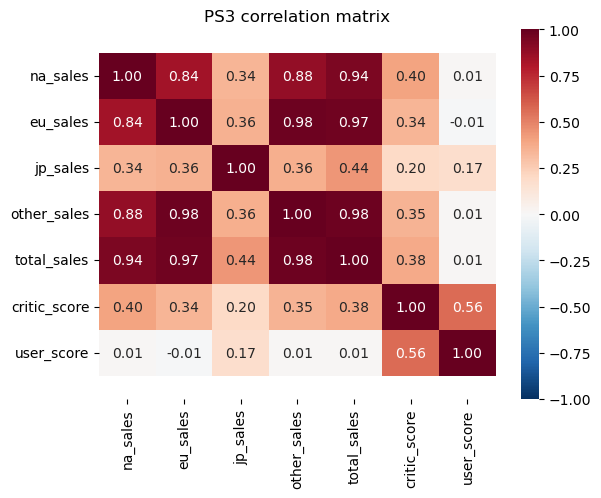

In [62]:
ax = sns.heatmap(corr, cmap=sns.color_palette("RdBu_r", 1000), vmin=-1, center=0, annot=True, fmt='.2f')
i, k = ax.get_ylim()
ax.set_ylim(i+0.5, k-0.5); 
plt.title('PS3 correlation matrix')

User ratings have no effect on global sales - the correlation coefficient is 0.01, although gamers in Japan listen to users' opinions a bit, there is a very weak positive correlation (0.17). Critics' evaluations are more important than users' evaluations, for global sales there is a weak positive correlation with a Pearson correlation coefficient of 0.38. Sales in North America and critic scores are slightly more strongly correlated, with a correlation coefficient of 0.4. Japanese gamers are the least responsive to critics' scores; the correlation coefficient between sales in Japan and critics' scores is 0.2.

There is an average positive correlation between gamers and critics, the correlation coefficient is 0.56.

The scatter plot shows that the top-selling games have high ratings from both critics and users.

In [63]:
name = ['3DS','PS3','PS4','X360','XOne']
def corr_matrix(name):
    for names in name:
        temp = df.query('year_of_release >= 2011 and platform == @names')
        temp2 = temp[['na_sales','eu_sales','jp_sales',
               'other_sales','total_sales','critic_score','user_score']]
        corr = temp2.corr()
        ax = sns.heatmap(corr, cmap=sns.color_palette("RdBu_r", 1000), vmin=-1, center=0, annot=True, fmt='.2f')
        i, k = ax.get_ylim()
        ax.set_ylim(i+0.5, k-0.5);
        plt.title('correlation matrix '+ names)
        plt.show()
        pd.plotting.scatter_matrix(temp2, figsize=(12,12))
        plt.suptitle('Scatter diagram ' + names)
        plt.show()

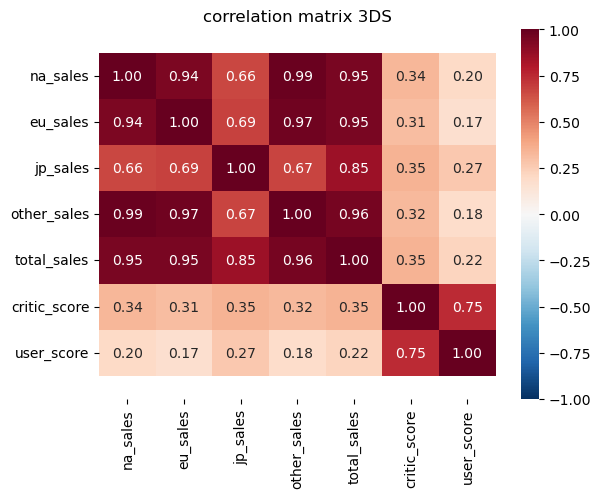

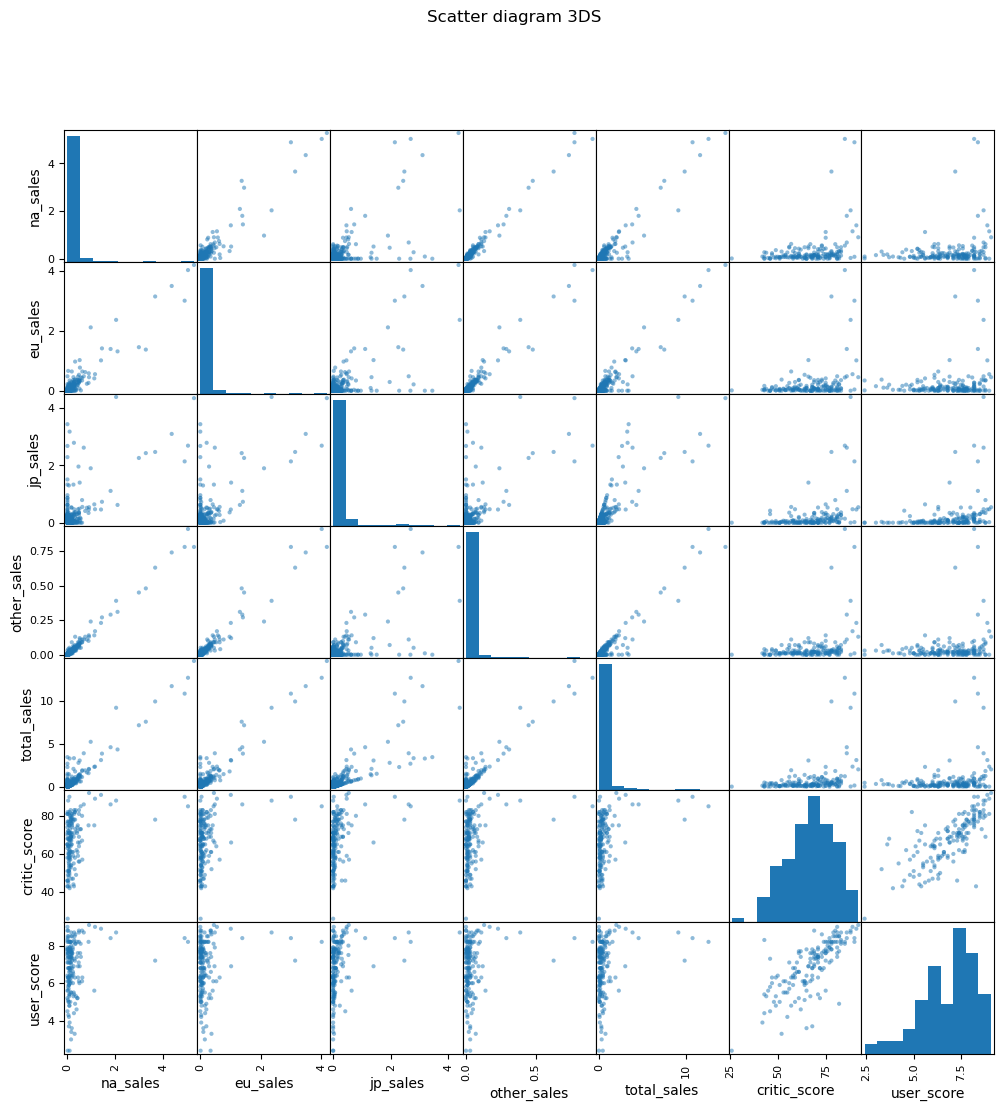

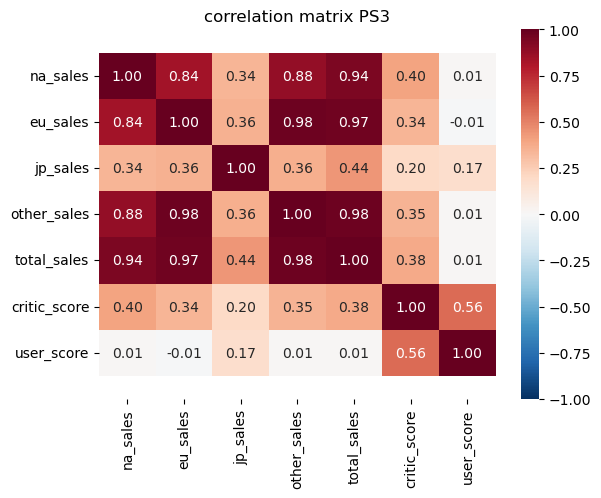

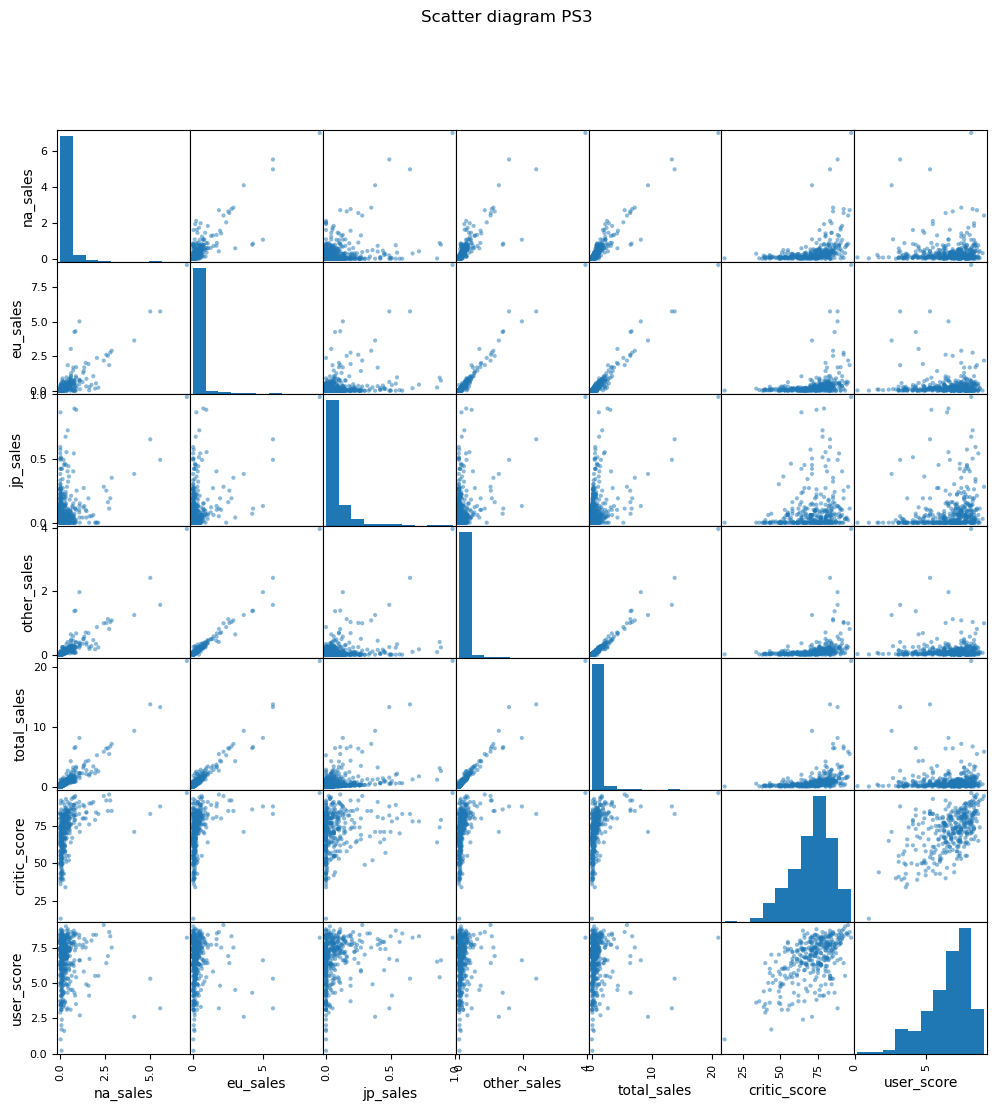

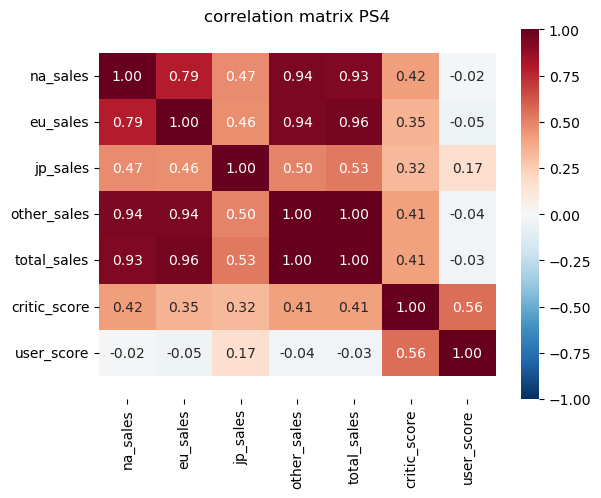

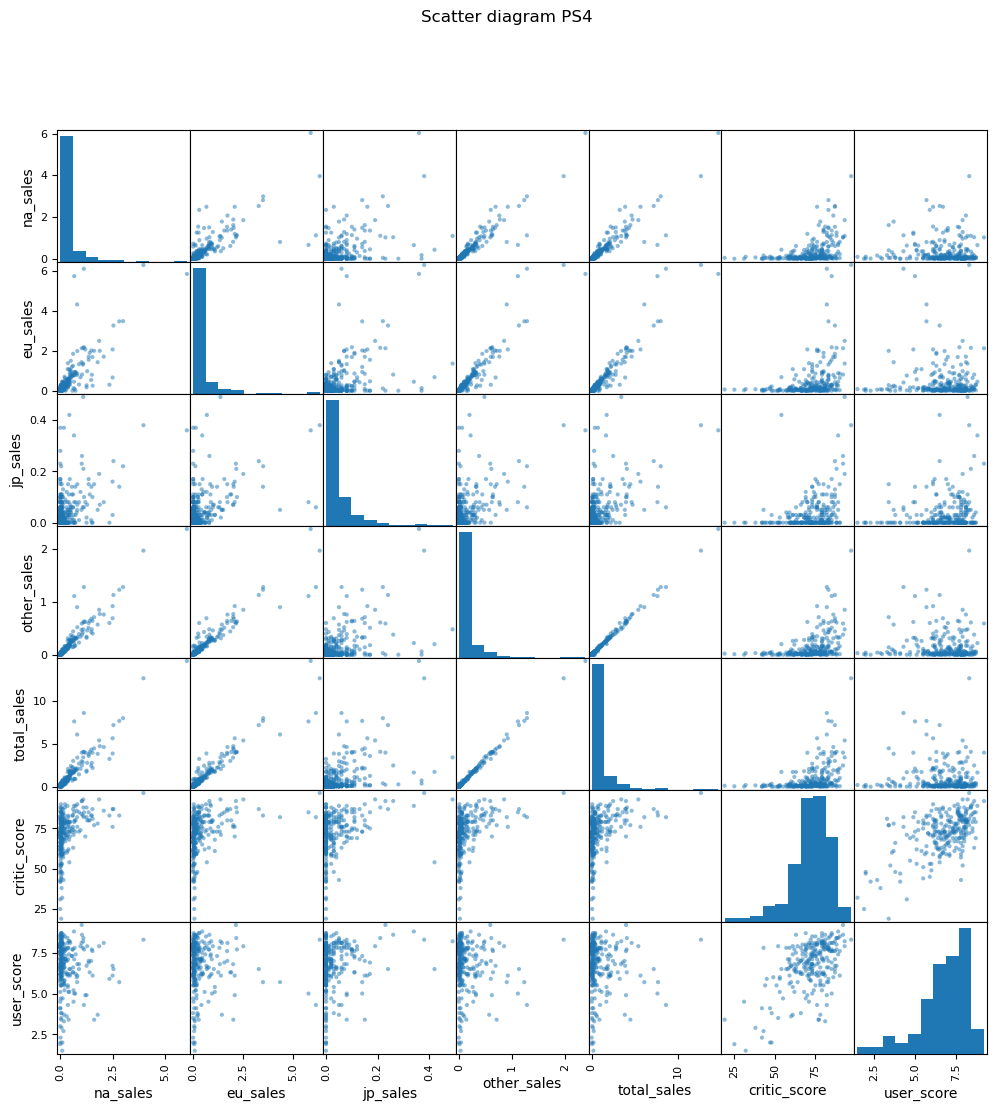

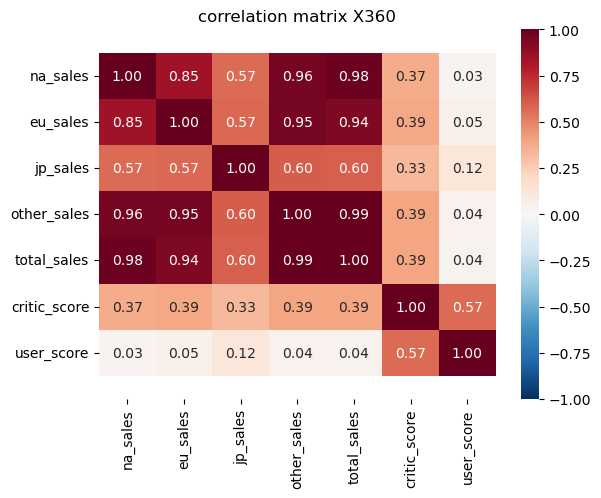

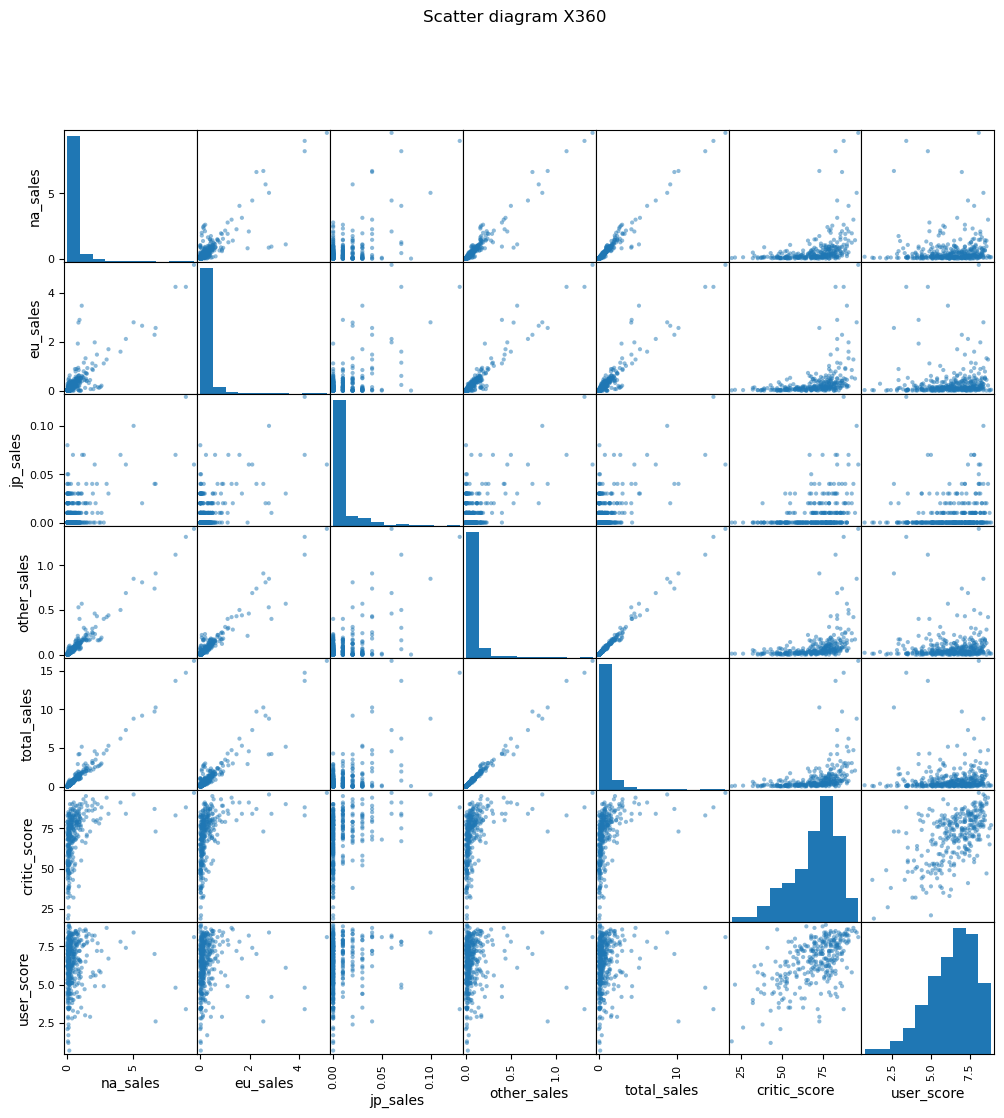

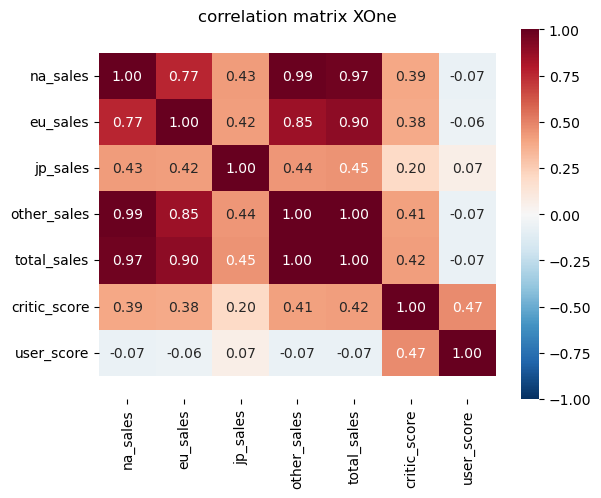

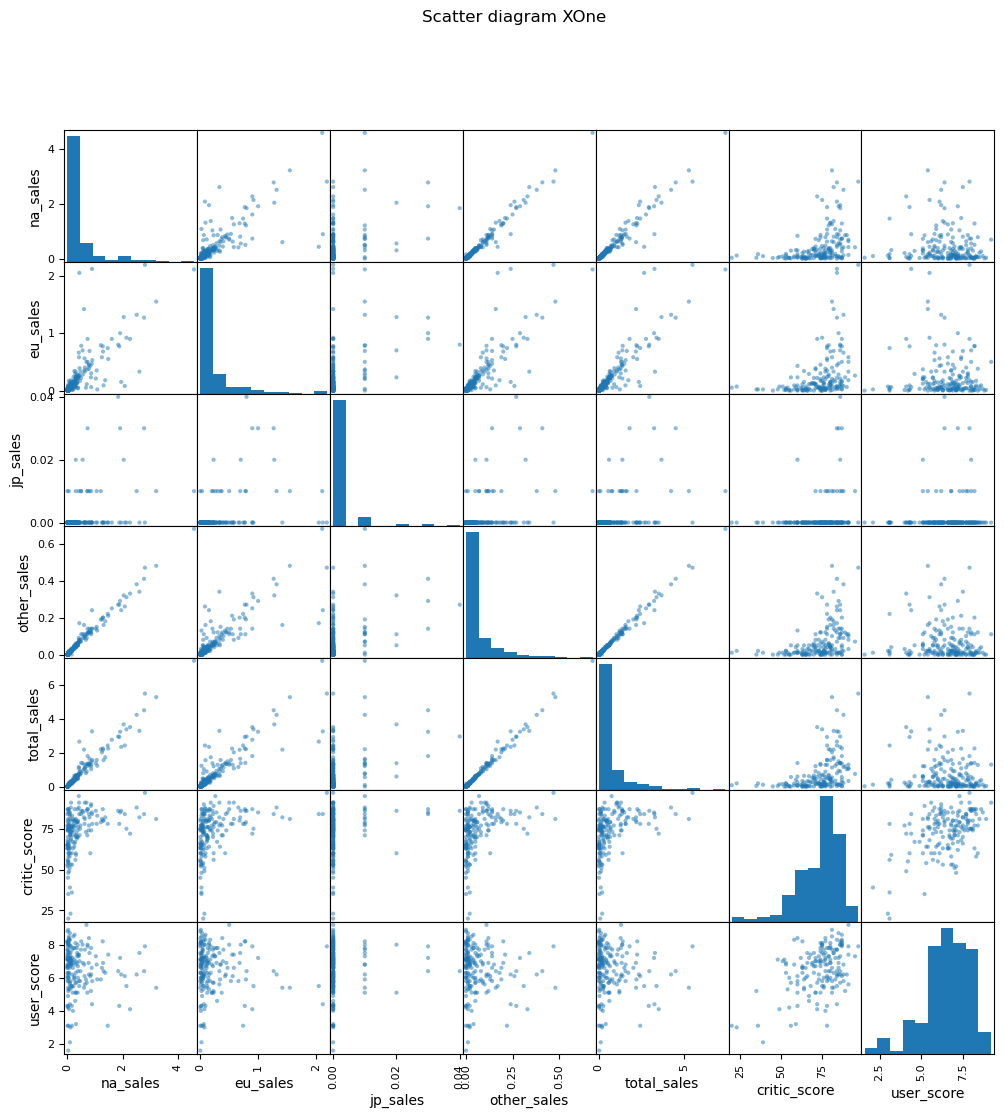

In [64]:
corr_matrix(name)

In general, based on the correlation matrices and scatter charts for PS4,XOne and X360 platforms, we can say that the conclusions obtained in the analysis of PS3 platform are consistent, but there are slight differences in the correlation coefficients.

The 3DS platform stands out from the rest of the Top 5 platforms as there is a very weak positive correlation between user ratings and the number of global sales, and there is a high positive correlation between critics' ratings and user ratings, with a correlation coefficient of 0.75.

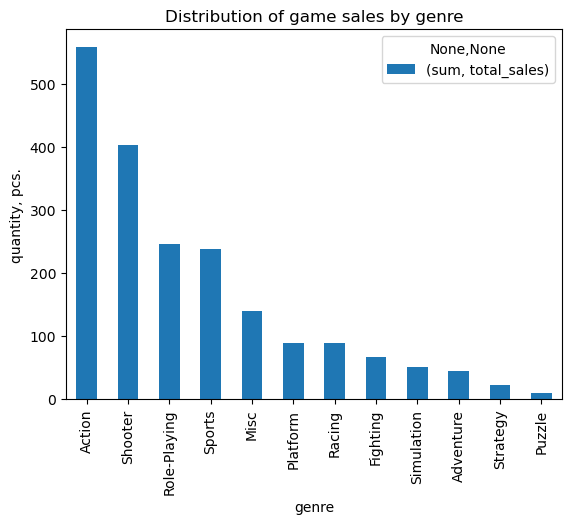

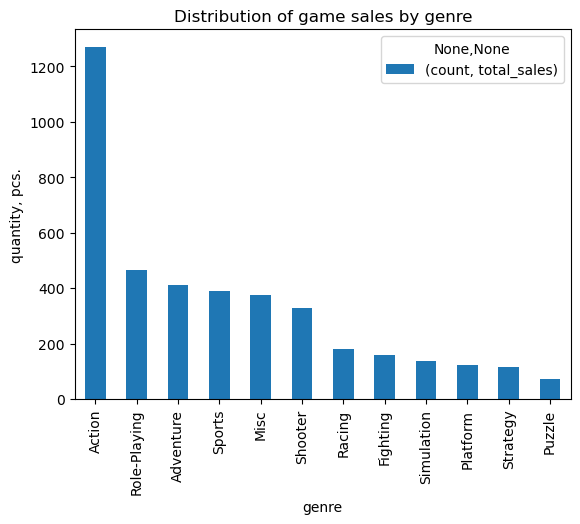

In [65]:
(df_test.pivot_table(index = 'genre', values = 'total_sales',
                    aggfunc = (['sum'])).sort_values(('sum','total_sales'), ascending = False)
 .plot(kind='bar')
)
plt.title('Distribution of game sales by genre')
plt.ylabel('quantity, pcs.')
plt.show()
(df_test.pivot_table(index = 'genre', values = 'total_sales',
                    aggfunc = (['count'])).sort_values(('count','total_sales'), ascending = False)
 .plot(kind='bar')
)
plt.title('Distribution of game sales by genre')
plt.ylabel('quantity, pcs.')
plt.show()

The best-selling games by genre - Action, shooters, role-playing games and sports games. The minimum sales of games in the puzzle genre.
In terms of the number of games released, the distribution is similar, except that RPGs are in second place in terms of the number of games in the genre.

### Conclusion

The distribution of computer games by platform and global sales is asymmetrical with a negative bias. Before 1994 less than 100 games per year were released. From 1994 to 2008 there was a gradual growth in the number of games released per year with the maximum number of games in 2008, which was 1426 units. From 2009 to 2015 there was a decline in the number of games released. From 2012 the number of released games varies from 500 to 650, this fact can be explained by the fact that games have become much more complicated in terms of graphics and gameplay and it takes more time to create a game. 

To predict game-industry behavior in 2017, the period from 2011 to 2016 was chosen (the number of games released decreases and then goes on a plateau).

The PlayStation series platforms lead in sales, with Microsoft platforms in second place. 

Sales for the PS3, 3DS and X360 platforms decline evenly from 2011 to 2016. Sales for the PS4 and XOne platforms are growing from 2013 to 2015 (possibly in 2016 as well, since the data is incomplete). The most promising platforms PS4 and XOne

On average, the minimum number of games for the period under review was sold for the 3DS platform, also for this platform there are games with a circulation of more than 14 million copies.  
Median values for the top 5 platforms: XOne 0.22, PS4 0.2, PS3 0.21, 3DS 0.12, X360 0.27. 
The largest scatter in the number of games sold, in descending order: PS3, X360, PS4, 3DS, XOne. 

Analysis of PS3 platform data showed that:
 - User evaluations do not affect the number of global sales - the correlation coefficient is 0.01, although gamers in Japan slightly listen to users' opinions, there is a very weak positive correlation (0.17). 
 - Critics' evaluations are more important than users' evaluations, for global sales there is a weak positive correlation with a Pearson correlation coefficient of 0.38. Sales in North America and critic scores are slightly more strongly correlated, with a correlation coefficient of 0.4. Japanese gamers listen to critics' scores the least; the correlation coefficient between sales in Japan and critics' scores is 0.2.
 - There is an average positive correlation between gamers and critics, with a correlation coefficient of 0.56. The top-selling games received high ratings from both critics and users.

In general, based on the correlation matrices and scatter charts for PS4,XOne and X360 platforms, we can say that the conclusions obtained during the analysis of PS3 platform agree, but there are slight differences in the correlation coefficients.

The 3DS platform stands out from the rest of the Top 5 platforms as there is a very weak positive correlation between user ratings and the number of global sales and there is a high positive correlation between critics' ratings and user ratings, the correlation coefficient is 0.75.

## Creating a user profile of each region

Let's write a function to select the Top 5 platforms by region.

In [66]:
df_test.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
29,Call of Duty: Modern Warfare 3,X360,2011,Shooter,9.04,4.24,0.13,1.32,88.0,3.4,M,14.73
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,unknown,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,unknown,14.60


In [67]:
def top_5_region(region):
    top5 = (df_test
     .pivot_table(index = ['platform'], 
                  values = [region], 
                  aggfunc = 'sum')
     .sort_values(region, ascending = False)
     .head()
    )
    return top5

In [68]:
top_5_na = top_5_region('na_sales')
top_5_eu = top_5_region('eu_sales')
top_5_jp = top_5_region('jp_sales')
top_5_other = top_5_region('other_sales')

In [69]:
sales_names

['na_sales', 'eu_sales', 'jp_sales', 'other_sales']

In [70]:
def top_5_region_merge(top_5_func,top,index):
    na = top_5_func(sales_names[0])
    eu = top_5_func(sales_names[1])
    jp = top_5_func(sales_names[2])
    other = top_5_func(sales_names[3])
    top5_all = na.merge(eu, how = 'outer', on = index) 
    top5_all = top5_all.merge(jp, how = 'outer', on = index) 
    top5_all = top5_all.merge(other, how = 'outer', on = index) 
    top5_all = top5_all.merge(top, how = 'outer', on = index) 
    return top5_all.sort_values('total_sales', ascending = False)

In [71]:
platforms_top5_all = top_5_region_merge(top_5_region,top_5,'platform')
platforms_top5_all

,na_sales,eu_sales,jp_sales,other_sales,total_sales
platform,,,,,
PS3,168.26,163.10,49.39,64.82,445.57
X360,226.80,117.10,NaN,33.13,380.38
PS4,108.74,141.09,15.96,48.35,314.14
3DS,82.65,61.27,100.62,13.27,257.81
XOne,93.12,NaN,NaN,14.27,159.32
PC,NaN,56.70,NaN,NaN,NaN
PSP,NaN,NaN,24.04,NaN,NaN
PSV,NaN,NaN,21.84,NaN,NaN


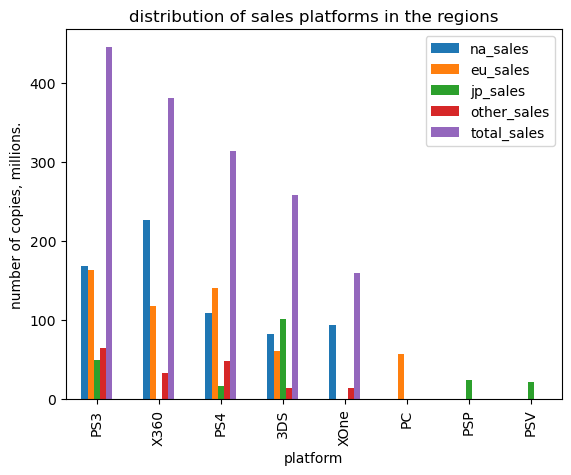

In [72]:
platforms_top5_all.plot(kind='bar')
plt.title('distribution of sales platforms in the regions')
plt.ylabel('number of copies, millions.')
plt.show()

The games in the Top 5 worldwide are fully represented in North America and in the "other" regions. In Europe, the fifth place of preference is for the PC platform, and in Japan the third and fourth places are occupied by the PSP and PSV platforms.

Let's calculate the percentage of sales in the regions, taking as 100% the sum of sales by platform in the top 5 in the world.

In [73]:
def fractions(top5_func,top5,index):
    na = top5_func(sales_names[0])
    eu = top5_func(sales_names[1])
    jp = top5_func(sales_names[2])
    other = top5_func(sales_names[3])
    na['fraction'] = na['na_sales']/ top_5['total_sales'].sum()
    eu['fraction'] = eu['eu_sales']/ top_5['total_sales'].sum()
    jp['fraction'] = jp['jp_sales']/ top_5['total_sales'].sum()
    other['fraction'] = other['other_sales']/ top_5['total_sales'].sum()

    reg = top5.merge(na, how='left', on=index)
    reg = reg.merge(eu, how='left', on=index)
    reg = reg.merge(jp, how='left', on=index)
    reg = reg.merge(other, how='left', on=index)

    reg.columns = ['total_sales','na_sales','na_fraction','eu_sales',
                'eu_fraction','jp_sales','jp_fraction','other_sales','other_fraction']

    fraction =  reg.drop(['total_sales','na_sales','eu_sales','jp_sales','other_sales'], axis = 1)
    return fraction

In [74]:
top_5_fraction = fractions(top_5_region,top_5,'platform')
top_5_fraction

/tmp/ipykernel_66/3778047372.py:14: FutureWarning: Passing 'suffixes' which cause duplicate columns {'fraction_x'} in the result is deprecated and will raise a MergeError in a future version.
  reg = reg.merge(other, how='left', on=index)


,na_fraction,eu_fraction,jp_fraction,other_fraction
platform,,,,
PS3,0.108052,0.104738,0.031717,0.041625
X360,0.145644,0.075198,NaN,0.021275
PS4,0.069830,0.090604,0.010249,0.031049
3DS,0.053075,0.039346,0.064615,0.008522
XOne,0.059799,NaN,NaN,0.009164


Посчитаем сумму долей продаж на всех платформах по регионам.

In [75]:
top_5_fraction.pivot_table(index = top_5_fraction.index, values = ['na_fraction',
                'eu_fraction','jp_fraction','other_fraction'])

,eu_fraction,jp_fraction,na_fraction,other_fraction
platform,,,,
3DS,0.039346,0.064615,0.053075,0.008522
PS3,0.104738,0.031717,0.108052,0.041625
PS4,0.090604,0.010249,0.069830,0.031049
X360,0.075198,NaN,0.145644,0.021275
XOne,NaN,NaN,0.059799,0.009164


In [76]:
top_5_fraction.sum().sum()

0.9645008412427274

Sum of shares for all regions is almost 96%. This figure is due to the fact that not all of the Top 5 platforms worldwide are represented in the regions. 

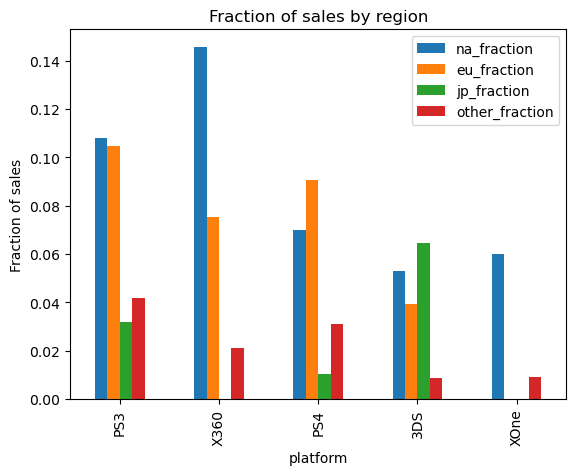

In [77]:
top_5_fraction.plot(kind = 'bar')
plt.title('Fraction of sales by region')
plt.ylabel('Fraction of sales')
plt.show()

Sales shares across all platforms by region:

In [78]:
top_5_fraction.sum()

na_fraction       0.436399
eu_fraction       0.309886
jp_fraction       0.106581
other_fraction    0.111635
dtype: float64

Residents of North America prefer to use (in descending order) platforms X360, PS3, PS4, XOne, 3DS.

Europeans prefer to use PS3, slightly less share of PS4, then X360 and 3DS, XOne platform is not in the top 5 in Europe (its place is taken by PC).

The Japanese, on the other hand, prefer 3DS, PS3 and PS4. The X360 and XOne platforms are not in the Top 5 in Japan, but there is the PSP and PSV.

The distribution of platforms by sales in the other regions is PS3, PS4, X360, XOne and 3DS.

In [79]:
def top_5_genres_region(region):
    top5 = (df_test
     .pivot_table(index = ['genre'], 
                  values = [region], 
                  aggfunc = 'sum')
     .sort_values(region, ascending = False)
     .head()
    )
    return top5

In [80]:
genres_top_5 = (df
 .query('year_of_release >= 2011')
 .pivot_table(index = ['genre'], 
              values = ['total_sales'], 
              aggfunc = 'sum')
 .sort_values('total_sales', ascending = False)
 .head()
)
top_5

,total_sales
platform,
PS3,445.57
X360,380.38
PS4,314.14
3DS,257.81
XOne,159.32


In [81]:
genres_top5_all = top_5_region_merge(top_5_genres_region,genres_top_5,'genre')


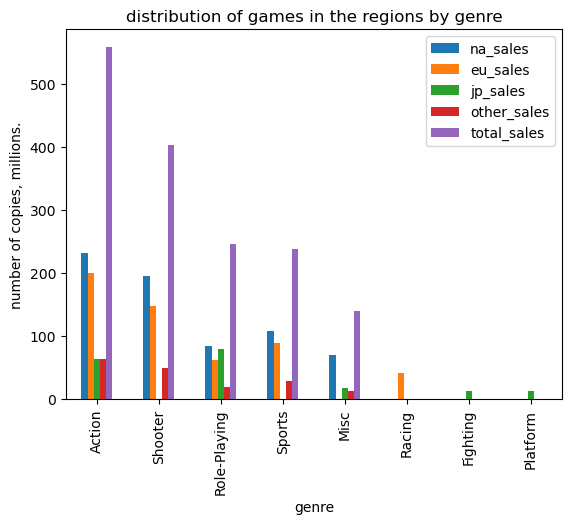

In [82]:
genres_top5_all.plot(kind = 'bar')
plt.title('distribution of games in the regions by genre')
plt.ylabel('number of copies, millions.')
plt.show()

In [83]:
top_5_genre_fraction = fractions(top_5_genres_region,genres_top_5,'genre')
top_5_genre_fraction

/tmp/ipykernel_66/3778047372.py:14: FutureWarning: Passing 'suffixes' which cause duplicate columns {'fraction_x'} in the result is deprecated and will raise a MergeError in a future version.
  reg = reg.merge(other, how='left', on=index)


,na_fraction,eu_fraction,jp_fraction,other_fraction
genre,,,,
Action,0.148290,0.127869,0.040855,0.041189
Shooter,0.124857,0.095054,NaN,0.031171
Role-Playing,0.053801,0.040007,0.051290,0.012638
Sports,0.069804,0.056819,NaN,0.018546
Misc,0.044753,NaN,0.011302,0.007969


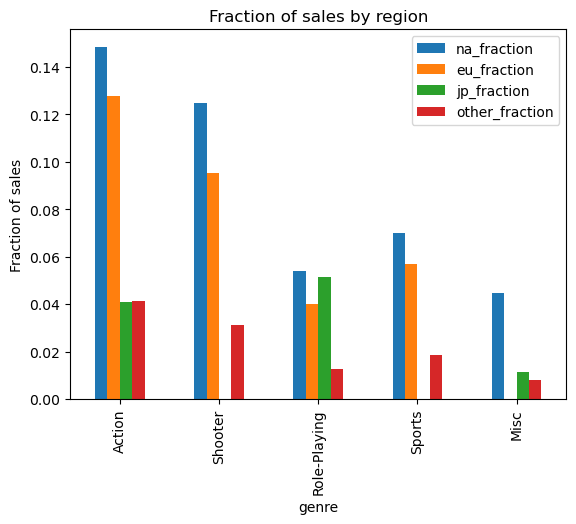

In [84]:
top_5_genre_fraction.plot(kind = 'bar')
plt.title('Fraction of sales by region')
plt.ylabel('Fraction of sales')
plt.show()

The preferences of users in North America and Europe are similar. The majority of users in these regions prefer Action games, followed by Shooter, sports and role-playing games. The difference in the preferences of users in these regions is that the fifth place for North American users is occupied by the Misc genre, and for European users - by the racing genre. Japanese users choose, in descending order, RPG, Action, Misc and genres outside the top 5: Fighting and Platform. 
In the "Other" regions, users prefer (in descending order): Action, Shooter, Sports, RPG and Misc.

Let's assess the effect of age rating on user activity by region.

In [85]:
df_test['rating'].unique()

array(['M', 'unknown', 'E', 'E10+', 'T', 'EC', 'RP'], dtype=object)

- M - For adults
- E - For everyone
- E10+ - For all ages 10 and up
- T - For teens
- EC - For younger children
- RP - Rating expected
- unknown - Rating unknown

In [86]:
df_test['num_rating'] = df_test.apply(rating, axis=1)

In [87]:
rating_sales = df_test.pivot_table(index = 'rating', 
                                   values = sales_names, aggfunc = ('sum')).sort_values('na_sales', ascending = False)
rating_sales

,eu_sales,jp_sales,na_sales,other_sales
rating,,,,
M,250.26,26.14,308.45,81.96
E,141.73,36.68,170.17,40.86
unknown,116.61,138.21,123.69,33.97
E10+,78.00,11.23,117.72,23.91
T,83.16,33.39,109.31,28.17
EC,0.00,0.00,0.42,0.03
RP,0.03,0.00,0.00,0.01


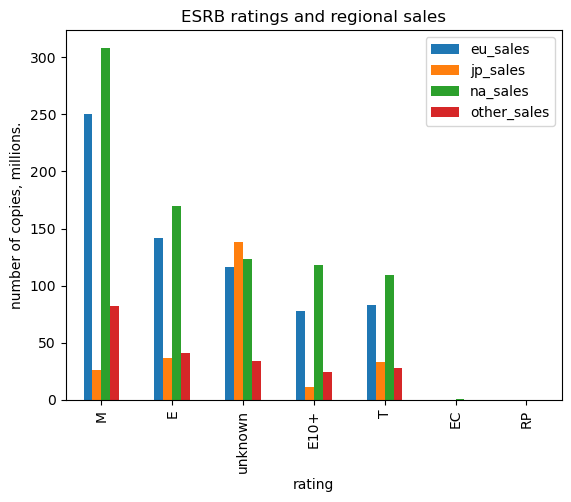

In [88]:
rating_sales.plot(kind='bar')
plt.title('ESRB ratings and regional sales')
plt.ylabel('number of copies, millions.')
plt.show()

For North America, Europe and other regions, there is a similar trend in sales depending on the ESRB rating. The highest number of sales are games for adults, then (in descending order) games for everyone, games rated unknown (we replaced missing values with unknown at the beginning of the project), games for children 10 and older, and games for teenagers. Sales of games for adults are almost twice as much as sales of games for teenagers.

The Japanese market shows a different picture: the maximum sales of games rated unknown, followed by games for everyone and games for teenagers, then games for adults and games for children older than 10 years old. 

The fraction of sales of games for young children is very small.

### Conclusion
User preferences for game platform choices in different regions:
- Games in the Top 5 globally are fully represented in North America and the "other" regions. In Europe, the PC platform ranks fifth in preference, while in Japan, the PSP and PSV platforms rank third and fourth.
- North American users prefer to use (in descending order) the X360, PS3, PS4, XOne, and 3DS platforms. Europeans prefer to use PS3, a bit less share of PS4, then X360 and 3DS, XOne platform is not in the top 5 in Europe (its place is taken by PC).
- The Japanese, on the other hand, prefer 3DS, PS3 and PS4. The X360 and XOne platforms are not in the Top 5 in Japan, but there is the PSP and PSV.
 - The distribution of platforms by sales in the remaining regions is PS3, PS4, X360, XOne and 3DS.

Popular game genres in the regions:
- User preferences in North America and Europe are similar. Most users in these regions prefer Action games, followed by Shooter, sports and role-playing games. The difference in the preferences of users in these regions is that the fifth place for North American users is occupied by the Misc genre, and for European users - by the racing genre. Japanese users choose RPG, Action, Misc and genres outside the top 5: Fighting and Platform, in descending order. 
- In the remaining regions, users prefer (in descending order): Action, Shooter, Sports, RPG and Misc. 

Impact of ESRB rating on sales:
- For North America, Europe and the rest of the regions, there is a similar trend in sales depending on the ESRB rating. The highest number of sales are for adult games, followed (in descending order) by games for everyone, games rated unknown (we replaced the missing values with unknown at the beginning of the project), games for children 10 and older, and games for teenagers. Sales of games for adults are almost twice as much as sales of games for teenagers.
- The Japanese market shows a different picture: the maximum sales of games rated unknown, followed by games for everyone and games for teenagers, then games for adults and games for children older than 10 years old. 
- The fraction of sales of games for young children is very small.

## Hypothesis Checking

Let's test the hypothesis that the average user ratings of Xbox and PC platforms are the same. To do this, we will choose from the data the period from 2013, since XOne was released in 2013.

Let's formulate the hepothesis as follows:
- The null hepothesis: the average user ratings of the XOne and PC platforms are equal.
- Alternative hepothesis: the average user ratings of XOne and PC platforms are not equal.

In [89]:
sample_1 = df.query('year_of_release >= 2013 and platform == "XOne"')['user_score'].dropna()
sample_2 = df.query('year_of_release >= 2013 and platform == "PC"')['user_score'].dropna()

alpha = .05 

results = st.ttest_ind(
    sample_1, 
    sample_2)

print('p-value:', results.pvalue)

if (results.pvalue < alpha):
    print("Rejecting the null hypothesis")
else:
    print("It was not possible to reject the null hypothesis") 

p-value: 0.14012658403611647
It was not possible to reject the null hypothesis


In [90]:
[sample_1.mean(),sample_2.mean()]

[6.521428571428572, 6.2696774193548395]

The resulting p-value suggests that although the average rating of XOne and PC platform users is unequal, there is a 14% probability that this or a larger difference can be obtained by chance. This is clearly a large probability to conclude that there is a significant difference between the average XOne and PC user ratings.

Let's check if Action and Sports genres have different ratings.
Let's formulate the null hypothesis as follows: Average user ratings of Action and Sports genres are equal.
Alternative hypothesis: Average user ratings for Action and Sports are not equal.

In [91]:
sample_1 = df.query('year_of_release >= 2011 and genre == "Action"')['user_score'].dropna()
sample_2 = df.query('year_of_release >= 2011 and genre == "Sports"')['user_score'].dropna()

alpha = .05 

results = st.ttest_ind(
    sample_1, 
    sample_2)

print('p-value:', results.pvalue)

if (results.pvalue < alpha):
    print("Rejecting the null hypothesis")
else:
    print("It was not possible to reject the null hypothesis") 

p-value: 5.1974550252152054e-24
Rejecting the null hypothesis


In [92]:
[sample_1.mean(),sample_2.mean()]

[6.775903614457831, 5.650813008130081]

The resulting p-value suggests that there is a 0% probability that this or a larger difference in the average user ratings for the Action and Sports genres can be obtained by chance. This is clearly too low a probability to conclude that the average user ratings are equal. Thus, we can say that we have reasonable grounds to believe that the average user ratings for the Action and Sports genres are not equal.

### Conclusion
The hypothesis that the average user ratings of Xbox and PC platforms are the same is confirmed: 
The resulting p-value suggests that although the average user ratings of the XOne and PC platforms are unequal, there is a 14% probability that such or greater difference can be obtained by chance. This is clearly a large probability to conclude that there is a meaningful difference between the average ratings of XOne and PC platform users.

Checking whether the Action and Sports genres have different ratings showed that:
The resulting p-value suggests that there is a 0% probability that such or greater difference in average user ratings for the Action and Sports genres can be obtained by chance. This is clearly too low a probability to conclude that the average user ratings are equal. Thus, we can say that we have reasonable grounds to believe that the average user ratings for the Action and Sports genres are not equal.

## General conclusion. 
 
- The distribution of computer games by platform and global sales is asymmetrical with a negative bias. Before 1994 less than 100 games per year were released. From 1994 to 2008 there was a gradual increase in the number of games released per year with the maximum number of games in 2008, which amounted to 1,426 units. From 2009 to 2015 there was a decline in the number of games released. From 2012 the number of released games varies from 500 to 650, this fact can be explained by the fact that the games have become much more complicated in terms of graphics and gameplay and it takes more time to create a game. 

Top 5 platforms (millions of copies):
- PS3 445.57
- X360 380.38
- PS4 314.14
- 3DS 257.81
- XOne 159.3

- To predict game-industry behavior in 2017, the period from 2011 to 2016 was chosen (the number of games released decreases and then plateaus).

- For the period under consideration, the PlayStation series platforms lead in sales year over year, with Microsoft platforms in second place, Sales for the PS3, 3DS and X360 platforms are evenly declining from 2011 to 2016. Sales for the PS4 and XOne platforms are growing from 2013 to 2015. The most promising platforms PS4 and XOne

- On average, the minimum number of games for the period under review was sold for the platform 3DS, also for this platform there are games with a circulation of more than 14 million copies.  

Analysis of data on the platform PS3 showed that:
 - User ratings have no effect on the number of global sales - the correlation coefficient is 0.01, although gamers in Japan listen to users' opinions a bit, there is a very weak positive correlation (0.17). 
 - Critics' evaluations are more important than users' evaluations, for global sales there is a weak positive correlation with a Pearson correlation coefficient of 0.38. Sales in North America and critic scores are slightly more strongly correlated, with a correlation coefficient of 0.4. Japanese gamers are the least responsive to critics' scores; the correlation coefficient between sales in Japan and critics' scores is 0.2.
 - There is an average positive correlation between gamers and critics, with a correlation coefficient of 0.56. The top-selling games received high ratings from both critics and users.

An analysis of the data for the other platforms showed that:
 - In general, based on the correlation matrices and scatter plots built for the platforms PS4,XOne and X360 we can say that the conclusions obtained in the analysis of PS3 platform are consistent with the other platforms, with the exception of 3DS platform, but there are slight differences in the correlation coefficients.
- The 3DS platform stands out from the other top 5 platforms as there is a very weak positive correlation between user ratings and global sales and a high positive correlation between critic scores and user ratings with a correlation coefficient of 0.75.

Users' preferences for the choice of gaming platforms in different regions:
- Games in the Top 5 globally are fully represented in North America and the "other" regions. In Europe, the fifth place of preference is for the PC platform, while in Japan the third and fourth places are occupied by the PSP and PSV platforms.
- North American users prefer to use (in descending order) the X360, PS3, PS4, XOne, and 3DS platforms. Europeans prefer to use PS3, a bit less share of PS4, then X360 and 3DS, XOne platform is not in the top 5 in Europe (its place is taken by PC).
- The Japanese, on the other hand, prefer 3DS, PS3 and PS4. The X360 and XOne platforms are not in the Top 5 in Japan, but there is the PSP and PSV.
 - The distribution of platforms by sales in the remaining regions is PS3, PS4, X360, XOne and 3DS.

Popular game genres in the regions:
- User preferences in North America and Europe are similar. Most users in these regions prefer Action games, followed by Shooter, sports and role-playing games. The difference in the preferences of users in these regions is that the fifth place for North American users is occupied by the Misc genre, and for European users - by the racing genre. Japanese users choose, in descending order, RPG, Action, Misc and genres outside the top 5: Fighting and Platform. 
- In the remaining regions, users prefer (in descending order): Action, Shooter, Sports, RPG and Misc. 

Impact of ESRB rating on sales:
- For North America, Europe, and the rest of the regions, there is a similar trend in sales depending on the ESRB rating. The highest number of sales are for adult games, followed (in descending order) by games for everyone, games rated unknown (we replaced the missing values with unknown at the beginning of the project), games for children 10 and older and games for teenagers. Sales of games for adults are almost twice as much as sales of games for teenagers.
- The Japanese market shows a different picture: the maximum sales of games rated unknown, followed by games for everyone and games for teenagers, then games for adults and games for children older than 10 years old. 
- The share of sales of games for younger children is very small.

The hypothesis that the average user ratings of Xbox and PC platforms are the same is confirmed: 
The resulting p-value suggests that although the average user ratings of the XOne and PC platforms are unequal, there is a 14% probability that such or greater difference can be obtained by chance. This is clearly a large probability to conclude that there is a significant difference between the average XOne and PC user ratings.

Checking "are the Action and Sports genres rated differently" revealed that:
The resulting p-value indicates that there is a 0% probability that such or greater difference in the average user ratings for the Action and Sports genres is due to chance. This is clearly too low a probability to conclude that the average user ratings are equal. Thus, we can say that we have reasonable grounds to believe that the average user ratings for the Action and Sports genres are not equal.

**Summarizing the above** we can conclude that 2017 may be a better year for selling games:
For users in North America, Europe and other regions (except Japan) - Action games on the PS4 platform for adult users, with positive reviews from critics being important.
For users in Japan - RPG games on PS4, and for successful sales in addition to critics' reviews are important.
